In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.tseries import offsets

In [3]:
uwchr = pd.read_csv('../input/2018-ICFO-00515 Highlighted_EDIT.csv.gz', sep='|', quotechar='"', compression='gzip')

In [4]:
icij = pd.read_csv('../input/icij-solitary-voices-final-dataset-for-publication.csv.gz', compression='gzip')

In [5]:
icij['placement_date'] = pd.to_datetime(icij['placement_date'])

In [6]:
icij_nwdc = icij[icij['facility'] == 'WA - Northwest Detention Center ']

In [7]:
uwchr['start_dt'] = pd.to_datetime(uwchr['Placement Date'])
uwchr['end_dt'] = pd.to_datetime(uwchr['Release Date'])

In [35]:
fy1 = uwchr.set_index('start_dt').groupby(pd.Grouper(freq='AS'))
m1 = uwchr.set_index('start_dt').groupby(pd.Grouper(freq='M'))

In [36]:
fy2 = icij_nwdc.set_index('placement_date').groupby(pd.Grouper(freq='AS'))
m2 = icij_nwdc.set_index('placement_date').groupby(pd.Grouper(freq='M'))

In [37]:
uwchr_count = fy1['Tracking Number'].nunique()

In [38]:
icij_count = fy2['record_id'].nunique()

In [39]:
uwchr_count.name = 'UWCHR count'

In [40]:
icij_count.name = 'ICIJ count'

In [41]:
df = pd.concat([uwchr_count, icij_count], axis=1)

In [42]:
df.index = df.index.year

In [43]:
# df.index.name = 'FY'

In [44]:
df = df.drop(2018)

In [45]:
df['Difference'] = df['UWCHR count'] - df['ICIJ count']

In [46]:
df.loc['Total'] = df.sum()

In [47]:
df

,UWCHR count,ICIJ count,Difference
start_dt,,,
2013,60.0,59.0,1.0
2014,82.0,82.0,0.0
2015,76.0,76.0,0.0
2016,42.0,43.0,-1.0
2017,74.0,12.0,62.0
Total,334.0,272.0,62.0


In [ ]:
# df.to_csv('../output/uwchr-icij-comparison.csv')

In [48]:
uwchr.start_dt.min()

Timestamp('2013-05-13 00:00:00')

In [49]:
icij.placement_date.min()

Timestamp('2012-04-30 00:00:00')

In [50]:
fy_chart = df.drop(['Total'])

In [51]:
uwchr_monthly = m1['Tracking Number'].nunique()
uwchr_monthly.name = "UWCHR count"

In [52]:
icij_monthly = m2['record_id'].nunique()
icij_monthly.name = "ICIJ count"

In [53]:
df2 = pd.concat([uwchr_monthly, icij_monthly], axis=1)

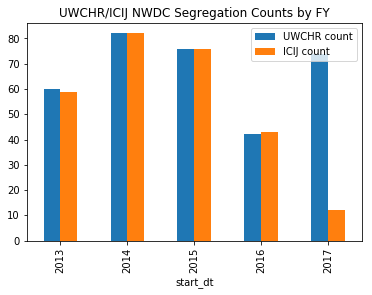

In [54]:
fy_chart[['UWCHR count', 'ICIJ count']].plot(kind='bar', title='UWCHR/ICIJ NWDC Segregation Counts by FY')

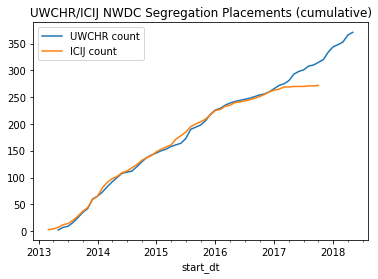

In [64]:
df2.cumsum().plot(title='UWCHR/ICIJ NWDC Segregation Placements (cumulative)')

In [56]:
icij_nwdc.head()

,record_id,citizenship,citizenship_id,facility_aor,state,facility,facility_id,placement_date,year,placement_reason,placement_reason_raw,release_date,days_solitary,mental_illness,no_suicide_watch
84,85,Palau,palau,SEA (Seattle),WA,WA - Northwest Detention Center,northwest_detention_center_wa,2013-03-06,2013,Facility Security Threat: Violent or Disruptiv...,facility_security_threat_violent_or_disruptive...,"Aug 15, 2013",73.0,no,no
93,94,Mexico,mexico,SEA (Seattle),WA,WA - Northwest Detention Center,northwest_detention_center_wa,2013-03-09,2013,Protective Custody: Gang Status (Protective Cu...,protective_custody_gang_status_protective_cust...,"Nov 27, 2013",85.0,no,no
100,101,Mexico,mexico,SEA (Seattle),WA,WA - Northwest Detention Center,northwest_detention_center_wa,2013-03-11,2013,Protective Custody: Other Detainee Safety,protective_custody_other_detainee_safety,"Jan 30, 2014",88.0,no,no
132,133,Mexico,mexico,SEA (Seattle),WA,WA - Northwest Detention Center,northwest_detention_center_wa,2013-04-12,2013,Facility Security Threat: Gang Member Status (...,facility_security_threat_gang_member_status_no...,"Jan 20, 2014",47.0,no,no
154,155,Mexico,mexico,SEA (Seattle),WA,WA - Northwest Detention Center,northwest_detention_center_wa,2013-05-10,2013,Disciplinary,disciplinary,"Oct 23, 2013",18.0,no,no


In [57]:
uwchr.columns

Index(['Tracking Number', 'Alien Number', 'Last Name', 'First Name', 'Gender',
       'Date of Birth', 'Country of Citizenship', 'Facility AOR', 'Facility',
       'Facility:DETLOC', 'Report Type', 'Placement Date', 'Placement Reason',
       'Release Date', 'Length of Stay', 'Disciplinary Infraction',
       'Sanction Length', 'Detailed Reason', 'Attorney of Record',
       'Attorney Notification', 'Detainee Request',
       'Compliance with Detention Standards', 'Mental Illness',
       'Serious Medical Illness', 'Serious Disability', 'Ever SMI?',
       'FO Recommendation', 'Additional Comments Export',
       'Non Compliance Detail', 'Special Criteria', 'ID', 'Current Review',
       'Created', 'LGBTI', 'Item Type', 'Path', 'start_dt', 'end_dt'],
      dtype='object')

In [58]:
icij_nwdc['days_solitary'].min()

1.0

In [59]:
uwchr['start_dt'] = pd.to_datetime(uwchr['Placement Date'])
uwchr['end_dt'] = pd.to_datetime(uwchr['Release Date'])

In [60]:
uwchr['solitary_length'] = uwchr['end_dt'] - uwchr['start_dt']

In [61]:
uwchr['solitary_length'].describe()

count                        357
mean     59 days 14:31:15.630252
std      88 days 06:18:57.166750
min              1 days 00:00:00
25%             19 days 00:00:00
50%             30 days 00:00:00
75%             62 days 00:00:00
max            781 days 00:00:00
Name: solitary_length, dtype: object

In [62]:
icij_nwdc['days_solitary'].describe()

count    260.000000
mean      51.942308
std       85.592735
min        1.000000
25%       17.000000
50%       27.000000
75%       42.250000
max      781.000000
Name: days_solitary, dtype: float64

In [63]:
icij['days_solitary'].describe()

count    8293.000000
mean       32.716870
std        49.910964
min         0.000000
25%         9.000000
50%        20.000000
75%        32.000000
max       781.000000
Name: days_solitary, dtype: float64